## Preparing the IMDB dataset

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500
batch_size = 32

print("Loading data...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), "train sequences")
print(len(input_test), "test sequences")

print("Pad sequences")
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)

print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## Training the model with Embedding and simpleRNN

In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
# You can add an LSTM network here.
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.4990 - acc: 0.7668 - val_loss: 0.3486 - val_acc: 0.8622
Epoch 2/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.2958 - acc: 0.8830 - val_loss: 0.3379 - val_acc: 0.8506
Epoch 3/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.2365 - acc: 0.9097 - val_loss: 0.3033 - val_acc: 0.8716
Epoch 4/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1995 - acc: 0.9259 - val_loss: 0.3160 - val_acc: 0.8734
Epoch 5/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1745 - acc: 0.9353 - val_loss: 0.3027 - val_acc: 0.8864
Epoch 6/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.1621 - acc: 0.9430 - val_loss: 0.3579 - val_acc: 0.8476
Epoch 7/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1384 - acc: 0.9520 - val_loss: 0.4657 - val_acc:

## Plotting the results

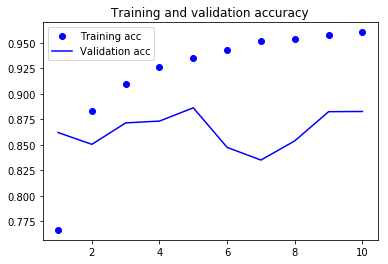

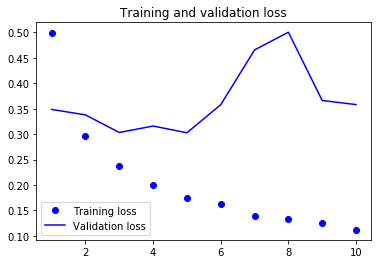

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()